In [87]:
import json
import pandas as pd

data = []

with open('data/sst2/train_newagain.jsonl') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df 

,0,1,text,label,label_text
0,0.497414,0.502586,"a stirring , funny and finally transporting re...",1,positive
1,0.513036,0.486964,apparently reassembled from the cutting-room f...,0,negative
2,0.507905,0.492095,they presume their audience wo n't sit still f...,0,negative
3,0.499005,0.500995,this is a visually stunning rumination on love...,1,positive
4,0.490091,0.509909,jonathan parker 's bartleby should have been t...,1,positive
...,...,...,...,...,...
6915,0.499151,0.500849,"painful , horrifying and oppressively tragic ,...",1,positive
6916,0.511033,0.488967,take care is nicely performed by a quintet of ...,0,negative
6917,0.509173,0.490827,"the script covers huge , heavy topics in a bla...",0,negative
6918,0.514860,0.485140,a seriously bad film with seriously warped log...,0,negative


In [88]:
def find_largest_column(row):
    # Get the column names of the largest values
    largest_column = row.idxmax()
    return largest_column

df['teacher_label'] = df[["0", "1"]].apply(find_largest_column, axis=1)
df['label'] = df['label'].apply(str)

df

,0,1,text,label,label_text,teacher_label
0,0.497414,0.502586,"a stirring , funny and finally transporting re...",1,positive,1
1,0.513036,0.486964,apparently reassembled from the cutting-room f...,0,negative,0
2,0.507905,0.492095,they presume their audience wo n't sit still f...,0,negative,0
3,0.499005,0.500995,this is a visually stunning rumination on love...,1,positive,1
4,0.490091,0.509909,jonathan parker 's bartleby should have been t...,1,positive,1
...,...,...,...,...,...,...
6915,0.499151,0.500849,"painful , horrifying and oppressively tragic ,...",1,positive,1
6916,0.511033,0.488967,take care is nicely performed by a quintet of ...,0,negative,0
6917,0.509173,0.490827,"the script covers huge , heavy topics in a bla...",0,negative,0
6918,0.514860,0.485140,a seriously bad film with seriously warped log...,0,negative,0


# Distribution of Labels

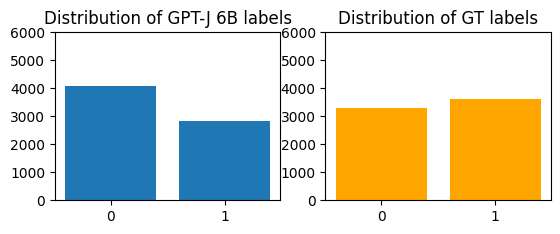

In [91]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["0", "1"]

def count_label(column_name):
    
    count = []

    for l in labels :
        num = len(df.loc[df[column_name] == l])
        count.append(num)

    return count

teacher_labels = count_label('teacher_label')
gt_labels = count_label('label')

plt.subplot(2,2,1)
plt.title('Distribution of GPT-J 6B labels')
plt.ylim(0, 6000)
x = np.arange(2)
plt.bar(x, teacher_labels)
plt.xticks(x, labels)

plt.subplot(2,2,2)
plt.title('Distribution of GT labels')
plt.ylim(0, 6000)
x = np.arange(2)
plt.bar(x, gt_labels, color = 'orange')
plt.xticks(x, labels)

plt.show()


## Comparing distribution of perplexity likelihoods for GPT-J soft labels

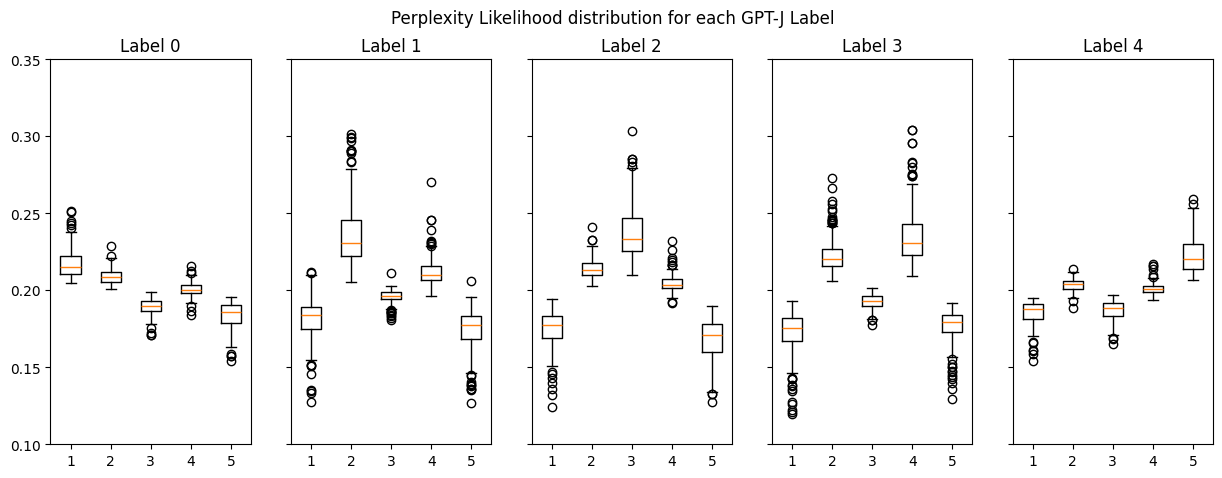

In [71]:
# Dict for rows corresponding to certain teacher_label 
classes = {}

for l in labels:
    classes[l] = df.loc[df['teacher_label'] == l]

fig, axs = plt.subplots(1, 5, sharey = True, figsize = (15, 5))

fig.suptitle('Perplexity Likelihood distribution for each GPT-J Label')

for i in range (0, 5):
    l = labels[i]
    axs[i].boxplot([classes[l]["0"], classes[l]["1"], classes[l]["2"], classes[l]["3"], classes[l]["4"]])

num = 0
for ax in axs:
    ax.set_title(f"Label {num}")
    ax.set_ylim(0.1, 0.35)
    num += 1

plt.show()


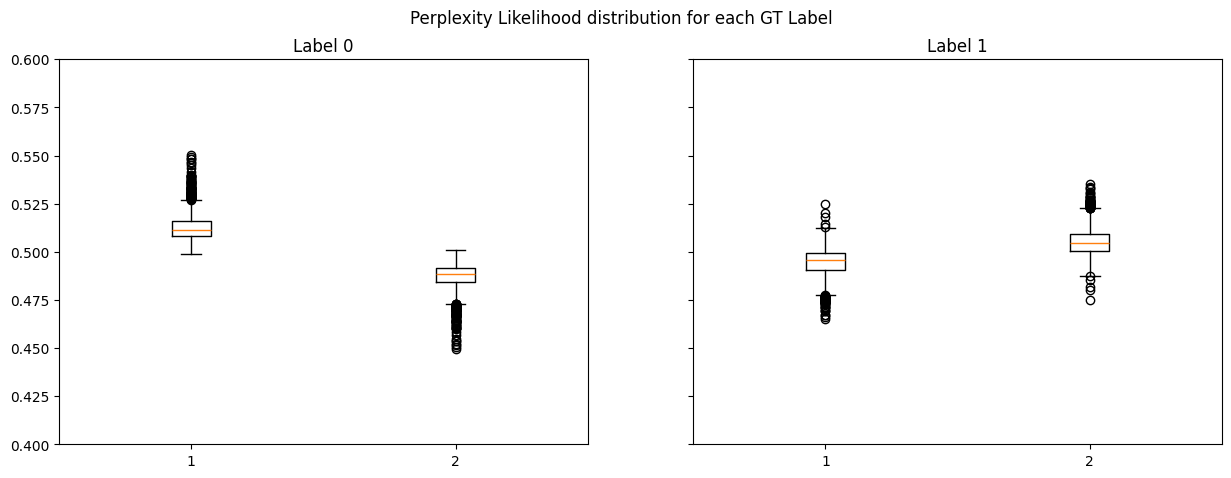

In [96]:
# Dict for rows corresponding to certain GT_label 
classes = {}

for l in labels:
    classes[l] = df.loc[df['label'] == l]

fig, axs = plt.subplots(1, 2, sharey = True, figsize = (15, 5))

fig.suptitle('Perplexity Likelihood distribution for each GT Label')

for i in range (0, 2):
    l = labels[i]
    axs[i].boxplot([classes[l]["0"], classes[l]["1"]])

num = 0
for ax in axs:
    ax.set_title(f"Label {num}")
    ax.set_ylim(0.4, 0.6)
    num += 1

plt.show()

In [93]:
l = len(df)
#right = len(df.loc[df['label'] == df['teacher_label']])
right = len(df.loc[df['teacher_label'] == df['label']])

print(right/l)

0.8864161849710983


# SST-2 Example

In [83]:
dfs = pd.read_csv('data/ickd_sst2_probs_n100.csv')
dfs

,index,sentence,label,negative_prob,positive_prob
0,0,hide new secretions from the parental units,0,0.999401,0.000599
1,1,"contains no wit , only labored gags",0,0.925769,0.074231
2,2,that loves its characters and communicates som...,1,0.141378,0.858622
3,3,remains utterly satisfied to remain the same t...,0,0.984465,0.015535
4,4,on the worst revenge-of-the-nerds clichés the ...,0,0.931876,0.068124
...,...,...,...,...,...
95,95,funny yet,1,0.500000,0.500000
96,96,overbearing and over-the-top,0,0.865811,0.134189
97,97,it 's robert duvall !,1,0.007118,0.992882
98,98,rich and sudden wisdom,1,0.015212,0.984788


In [76]:
dfs['teacher_label'] = dfs[["negative_prob", "positive_prob"]].apply(find_largest_column, axis=1)
dfs['label'] = dfs['label'].apply(str)

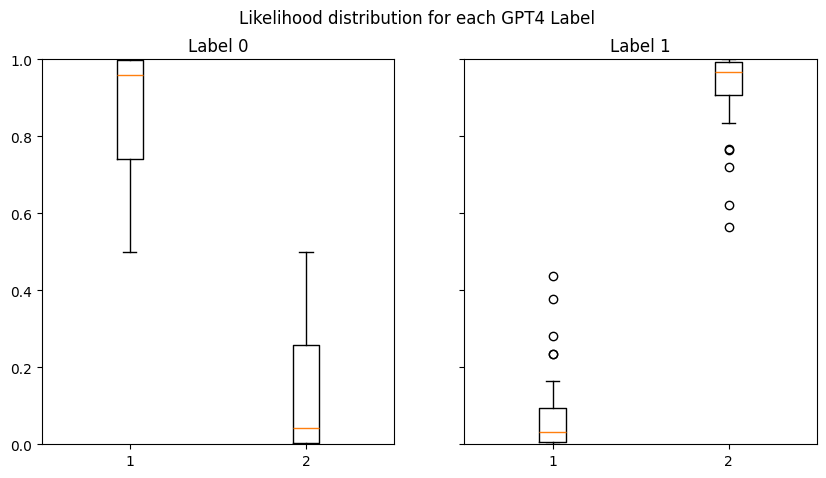

In [81]:
labels = ["negative_prob", "positive_prob"]

# Dict for rows corresponding to certain teacher_label 
classes = {}

for l in labels:
    classes[l] = dfs.loc[dfs['teacher_label'] == l]

fig, axs = plt.subplots(1, 2, sharey = True, figsize = (10, 5))

fig.suptitle('Likelihood distribution for each GPT4 Label')

for i in range (0, 2):
    l = labels[i]
    axs[i].boxplot([classes[l]["negative_prob"], classes[l]["positive_prob"]])

num = 0
for ax in axs:
    ax.set_title(f"Label {num}")
    ax.set_ylim(0.0, 1.0)
    num += 1

plt.show()


In [84]:
train_split = dfs[:80]
test_split = dfs[80:]

train_split.to_csv('data/sst2/train_sst2.csv')
test_split.to_csv('data/sst2/test_sst2.csv')

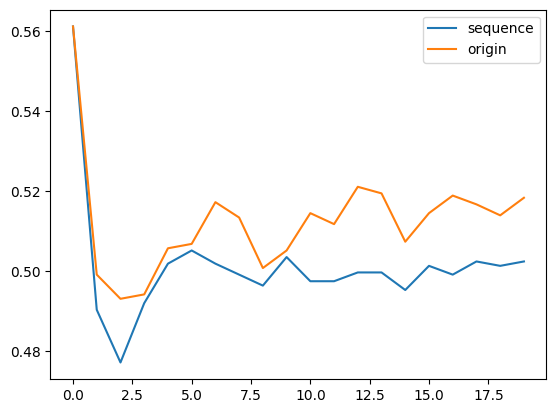

In [86]:
import matplotlib.pyplot as plt

sequence = 	[0.5612300933552993, 0.4903898956617243, 0.4772103239978034, 0.49203734211971445, 0.5019220208676551, 0.5052169137836353, 0.5019220208676551, 0.49917627677100496, 0.4964305326743548, 0.5035694673256452, 0.4975288303130148, 0.4975288303130148, 0.499725425590335, 0.499725425590335, 0.4953322350356947, 0.5013728720483251, 0.49917627677100496, 0.5024711696869851, 0.5013728720483251, 0.5024711696869851]
origin = [0.5612300933552993, 0.49917627677100496, 0.49313563975837454, 0.4942339373970346, 0.5057660626029654, 0.5068643602416255, 0.5172981878088962, 0.513454146073586, 0.500823723228995, 0.5052169137836353, 0.5145524437122461, 0.5118066996155958, 0.5211422295442065, 0.5194947830862163, 0.5074135090609555, 0.5145524437122461, 0.5189456342668863, 0.5167490389895661, 0.514003294892916, 0.5183964854475562]

x = [n for n in range(20)]
plt.plot(x, sequence, label = 'sequence')
plt.plot(x, origin, label = 'origin')

plt.legend()